In [7]:
import sys
sys.path.append("../")

from torch_geometric.utils import scatter
from graphtoviz.datasets import read_data

loader = read_data("KarateClub")

In [8]:
for data in loader:
    print(data)
    x = scatter(data.x, data.batch, dim=0, reduce='mean')
    x.size()

DataBatch(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34], batch=[34], ptr=[2])


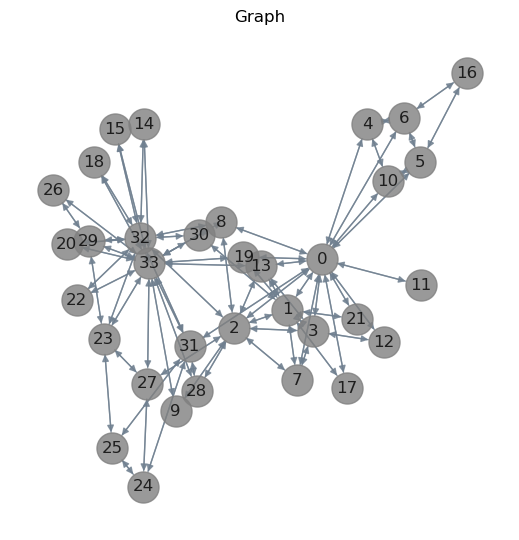

In [9]:
from graphtoviz.plots import plot_graph
g = plot_graph(data, with_labels=True)

In [10]:
import networkx as nx
import torch_geometric
a = torch_geometric.utils.to_networkx(data[0])
b = nx.betweenness_centrality(a)

import pandas as pd
b = pd.DataFrame(b.items(), columns=['node', 'betweenness']).sort_values(by='betweenness', ascending=False).head(10).reset_index(drop=True)

In [11]:
METRICS = {
    "Degree of Centrality": nx.degree_centrality,
    "Betweenness Centrality": nx.betweenness_centrality,
    "Closeness Centrality": nx.closeness_centrality,
    "Eigenvector Centrality": nx.eigenvector_centrality,
    "Katz Centrality": nx.katz_centrality,
    "Pagerank": nx.pagerank,
    "Harmonic Centrality": nx.harmonic_centrality,
    "Edge Betweenness Centrality": nx.edge_betweenness_centrality,
}

m = {}
o = pd.DataFrame()
for metric in METRICS:
    b = pd.DataFrame(METRICS[metric](a).items(), columns=['node', 'metric']).sort_values(by='metric', ascending=False).head(10).reset_index(drop=True)
    m[metric] = b
    o = pd.concat([o, b['node']], axis=1)
    o.columns = m.keys()

In [12]:
# calculate overlap between metrics
import numpy as np
overlap = np.zeros((len(METRICS), len(METRICS)))
for i, m1 in enumerate(m):
    for j, m2 in enumerate(m):
        overlap[i, j] = len(set(m[m1]['node']) & set(m[m2]['node']))
overlap = pd.DataFrame(overlap, columns=m.keys(), index=m.keys())

overlap

,Degree of Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Katz Centrality,Pagerank,Harmonic Centrality,Edge Betweenness Centrality
Degree of Centrality,10.0,8.0,9.0,9.0,9.0,10.0,9.0,0.0
Betweenness Centrality,8.0,10.0,9.0,8.0,8.0,8.0,9.0,0.0
Closeness Centrality,9.0,9.0,10.0,9.0,9.0,9.0,10.0,0.0
Eigenvector Centrality,9.0,8.0,9.0,10.0,10.0,9.0,9.0,0.0
Katz Centrality,9.0,8.0,9.0,10.0,10.0,9.0,9.0,0.0
Pagerank,10.0,8.0,9.0,9.0,9.0,10.0,9.0,0.0
Harmonic Centrality,9.0,9.0,10.0,9.0,9.0,9.0,10.0,0.0
Edge Betweenness Centrality,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


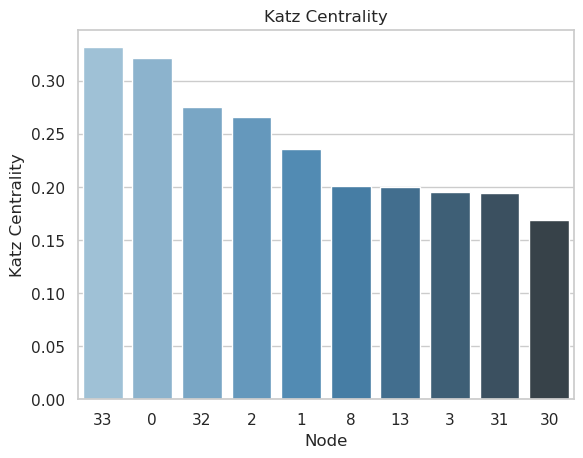

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

select = 'Katz Centrality'
s = m[select]

sns.set(style="whitegrid")
# plot in order of betweenness centrality descending
ax = sns.barplot(y="metric", x="node", data=s, palette="Blues_d", order=s['node'])
ax.set_title(f'{select}')
ax.set_ylabel(f'{select}')
ax.set_xlabel('Node')
plt.show()


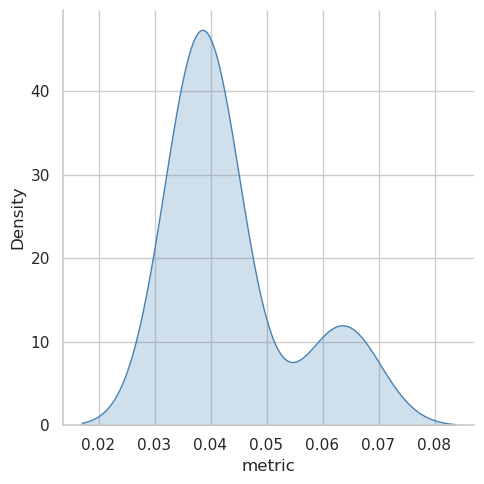

In [16]:
ax = sns.displot(b, x="metric", kind='kde', fill=True, color = 'steelblue')
plt.show()